# Simple Linear Regression

you can find dataset = https://drive.google.com/file/d/1fiHg5DyvQeRC4SyhsVnje5dhJNyVWpO1/view

# Import necessary library such as pandas, numy, matplotlib, seaborn and sklearn

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# Read data set 'Weather' and store in pandas dataframe

In [70]:
df = pd.read_csv('Weather.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


 **Statical infromation from our dataset can see as below**

use describe()


In [71]:
df.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SND,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,118566.000000,118572.000000,118542.000000,5563.0,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,81.003745,64.273808,72.644843,0.0,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,14.869361,14.481498,14.211082,0.0,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,-28.000000,-37.000000,-32.000000,0.0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,78.000000,59.000000,69.000000,0.0,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,85.000000,70.000000,78.000000,0.0,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,89.000000,74.000000,81.000000,0.0,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,122.000000,94.000000,104.000000,0.0,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN



**Lets find out how much our columns and row we have**

In [72]:
df.shape

(119040, 31)

**we can plot our data to see any relationship from our variable, using script below**

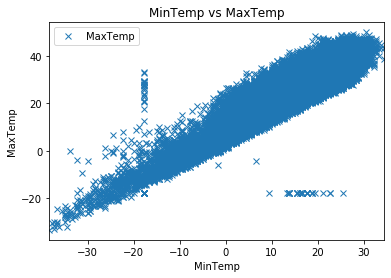

In [73]:
df.plot(x='MinTemp', y='MaxTemp', style='x')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

**Next, divide data into 'attributes' and 'labels'**

attributes = independent variables

labels = dependent variables

In [0]:
x = df['MinTemp'].values.reshape(-1,1)
y = df['MaxTemp'].values.reshape(-1,1)

**Next, we split data into 'train' and 'test' data**

We split 80% of the data to the training set and 20% of the data to test set

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

**After split data, we fit data to regression model**

We train our algorithm using train set data as script below

In [76]:
regmodel = LinearRegression()  
regmodel.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**We can find our intercept and coef as script below**

In [77]:
print(regmodel.intercept_)
print(regmodel.coef_)

[10.66185201]
[[0.92033997]]


**After we know the coefficient and intercept We can write our regression formal as below**

Y = 10.66185201 * 0.92033997X


**Next, We will predict the value of y using our model created before**

In [0]:
y_pred = regmodel.predict(x_test)

**We can store our predicted value in dataframe and compare it with the actual value as below**

In [80]:
df_predic = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_predic

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
...,...,...
23803,32.777778,32.136451
23804,32.222222,29.068651
23805,31.111111,32.647751
23806,31.111111,30.602551


**Also we can create bar chart to compare our actual and prediction value**

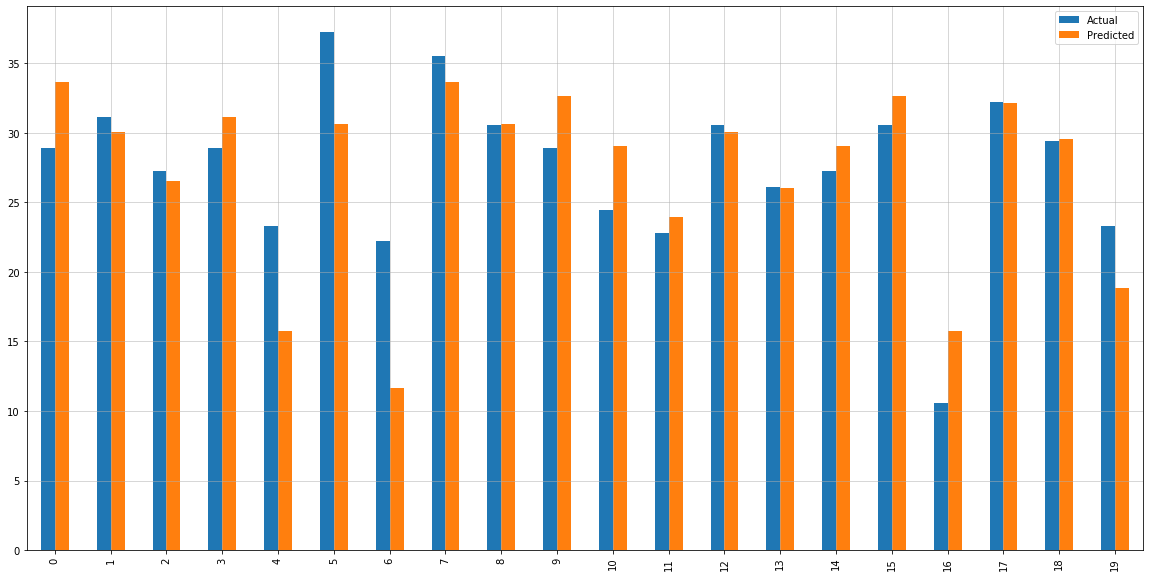

In [84]:
df1 = df_predic.head(20)
df1.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

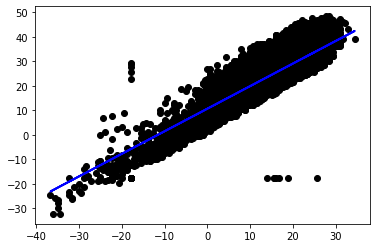

In [88]:
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=2)
plt.show()

**The straight line in the above graph shows our algorithm is correct.**

In [89]:
mea = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
print("mean absolute error :",mea)
print("mean square error :",mse)

mean absolute error : 3.19932917837853
mean square error : 17.631568097568447
